In [2]:
import torch
from torch import nn
from d2l import torch as d2l

In [3]:
def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    if dropout == 0:
        return X
    if dropout == 1:
        return torch.zeros(X.shape)
    
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1 - dropout)

In [4]:
X= torch.arange(16, dtype = torch.float32).reshape((2, 8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1.))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  0.,  0.,  0.,  8.,  0.,  0.,  0.],
        [16.,  0., 20.,  0.,  0.,  0., 28., 30.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


In [5]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

In [11]:
# dropout_1, dropout_2 = 0, 0
dropout_1, dropout_2 = 0.2, 0.5

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2, is_train = True) -> None:
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.is_train = is_train
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()
    
    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape(-1, self.num_inputs)))
        if self.is_train == True:
            H1 = dropout_layer(H1, dropout_1)
        H2 = self.relu(self.lin2(H1))
        if self.is_train == True:
            H1 = dropout_layer(H2, dropout_2)
        out = self.lin3(H2)
        return out
    
net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)
        

loss 0.295, train acc 0.889, test acc 0.862
157396.3 examples/sec on cpu


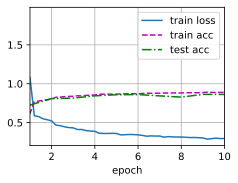

In [10]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, 'cpu')

## Simple Implement

In [12]:
net = nn.Sequential(nn.Flatten(),
        nn.Linear(784, 256),
        nn.ReLU(),
        # 在第一个全连接层之后添加一个dropout层
        nn.Dropout(dropout_1),
        nn.Linear(256, 256),
        nn.ReLU(),
        # 在第二个全连接层之后添加一个dropout层
        nn.Dropout(dropout_1),
        nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.2, inplace=False)
  (7): Linear(in_features=256, out_features=10, bias=True)
)

loss 0.322, train acc 0.880, test acc 0.860
96951.4 examples/sec on cpu


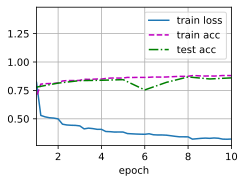

In [13]:
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, 'cpu')